In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BACTH_SIZE = 32
channel = 3
EPOCHS = 50

In [5]:
datasets = tf.keras.preprocessing.image_dataset_from_directory(
    "datasets",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BACTH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = datasets.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
# mengetahui panjang dari dataset
len(datasets)

68

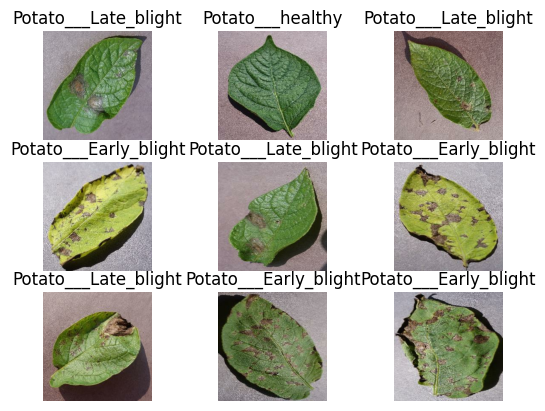

In [14]:
for image_batch, labels_batch in datasets.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")


In [ ]:
# 80% ==> training
# 20% ==> 10% validation, 10% testing

In [15]:
# Pembagian dataset
train_size = 0.8
len(datasets) * train_size

54.400000000000006

In [16]:
train_ds = datasets.take(54)
len(train_ds)


54

In [17]:
test_ds = datasets.skip(54)
len(test_ds)

14

In [18]:
val_size = 0.1
len(datasets) * val_size

6.800000000000001

In [19]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [20]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [24]:
def get_dataset_partitions_tf(datasets, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + val_split + test_split) == 1

    if shuffle:
        datasets = datasets.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * len(datasets))
    val_size = int(val_split * len(datasets))

    train_ds = datasets.take(train_size)
    val_ds = datasets.skip(train_size).take(val_size)
    test_ds = datasets.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [25]:
datasets, val_ds, test_ds = get_dataset_partitions_tf(datasets)

In [26]:
len(datasets), len(val_ds), len(test_ds)

(43, 5, 6)

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [30]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

In [31]:
# data augmentation 
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])